<a href="https://colab.research.google.com/github/bhagu/1000-Days-Of-Code/blob/main/Preparing_Data_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data For Machine Learning - Pluralsight Course

#Understanding the Need for Data Preparation

##Module Focus
Insufficient Data;
Excessive or overly complex data;
Non-representative data, missing data, outlier;
Oversampling and understanding;
Overfitting and underfitting models;

### Insufficient Data
Leads to Overfitting/ Underfitting

No great solution for insufficient data

Simply need to find more data sources

Dealing with Small Datasets

Model complexity - Simpler model with fewer model parameters, Less susceptible to overfitting, e.g. Naive Bayes classifier, logistic regression, Use ensemble techniques

Transfer learning - the practice of reusing a trained neural network that solves a problem similar to yours, usually leaving the network architeture unchanged and re-using some of all of the model weights

Data augmentation - Increase the number of training samples, Perturbed images are a form of data augmentation, Scaling, rotation, affine transforms, Makes CNN training more robust

Synthetic data - Artificially generate samples which mimic real world data


###Too Much Data
Data might be excessive in 2 ways

- Curse of dimensionality: Too many columns/features
- Outdated historical data: Too many rows

Concept Drift: The relationship between features (X-variables) and labels (Y-variables) changes over time; ML models fail to keep up, and consequently their performance suffers

Outdated historical data: If not eliminated, leads to concept drift;
This is a serious issue in specific applications
- Financial trading

Usually require human expert to judge which rows to leave out

Curse of dimensionality: 2 specific problems arise when too much data is available
- Deciding which data is actually relevant
- Aggregating very low-level data into useful features

Easier problem to solve:
- Feature selection: Deciding which data is actually relevant
- Feautre engineering: Aggregating very low-level data into useful features
- Dimensionality reduction: Reduce complexity without losing information

Concept Hierarchy: A mapping that combines very low-level features (e.g. latitudes and longitudes) into more general, usable features (e.g. zip codes)




###Non-Representative Data
Data is inaccurate, small errors have significant impact

Account for data cleaning and processing time

Data is not representative of the real world i.e. biased

Leads to biased models that perform poorly in practice

Mitigate using oversampling and undersampling

###Duplicate Data
If data can be flagged as duplicate, problem relatively easy to solve
- Simply de-duplicate

Can be hard to identify in some applications
- Real-time streaming

###Missing Data and Outliers
Data cleaning procedures can help significantly mitigate the effects of
- Missing data
- Outliers

Missing Data
- Deletion
- Imputation

Deletion / Listwise Deletion: Delete an entire record (row) if a single value (column) is missing. Simple, but can lead to bias

- Most common method in practices
- Can reduce sample size significanlty
- If values are not missing at random, can intriduce significant bias

Imputation: Fill in missing values, rather than deleting records with missing values. Missing values are inferred from known data.

- Methods range from very simple to very complex
- Simplest method - Use column average
- Can interpolate from nearby values 
- Can even build model to predict missing values

Univariate Imputation: rely only on known values in same feature

Multivariate imputation: Use all known data to infer missing value
- Construct regression models from other columns to predict this column
- Iteratively repeat for all columns

Hot-deck Imputation:
- Sort records based on any criteria
- for each missing value, use immediately prior available value
- "Last Observation Carried Forward"
- For time-series data, equivalent to assuming no change since last measurement

Mean Substitution:
- For each missing value, substitute mean of all available values
- Has effect of weakening correlations between columns
- Can be problematic when bivariate analysis is required

Regression:
- Fit model to predict missing column based on other column values
- Tends to strengthen correlations
- Regression and mean substitution have complementary strengths

Outliers
- Identifying Outliers
  - Distance from Mean
  - Distance from fitted line
- Coping with Outliers
  - Drop
  - Cap/Floor
  - Set to mean

Identifying Outliers

More than 3 Standard deviation - Distance from mean

Might also be data points that do not fit into the same relationship as the rest of the data


Coping with Outliers
- Always start by scrutinizing outliers
- If erroneous observation
  - Drop if all attributes of that point are erroneous
  - Set to mean if only one attribute is erroneous
- If genuine, legitimate outlier
  - Leave as-is if model is not distorted
  - Cap/Floor if model is distorted
    - Need to first standardize data
    - Cap positive outliers to +3
    - Floor negative outliers to -3

###Oversampling and Undersampling
Techniques that intentionally add bias to the data in order to make it balanced

Balacing Datasets
- Oversampling uncommon x or y values
- Undersampling of common x or y values

Forcibly Balanced Datasets

Oversampling and undersampling tend to
- Reduce accuracy
- Increase precision and recall

Related techniques include
- Case studies
- Stratified sampling

###Overfitting and Underfitting
Overfitting
- Model has memorized the training data
- Low training error
- Doesn't work well in the real world
- High test error

Underfitting
- Model unable to capture relationships in data
- Performs poorly on the training data
- Model too 'simple' to be useful

#Implementing Data Cleaning and Transformation

##Handling Missing Values

In [324]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [325]:
print(sklearn.__version__)

0.22.2.post1


In [326]:
print(np.__version__)

1.19.5


In [327]:
print(pd.__version__)

1.1.5


In [328]:
automobile_df = pd.read_csv("cars.csv")

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [329]:
automobile_df.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'bore', 'stroke',
       'compression-ratio'],
      dtype='object')

In [330]:
automobile_df.describe()

,MPG,Horsepower,bore,stroke
count,385.000000,394.000000,394.000000,394.000000
mean,23.551429,104.337563,3.305025,3.289289
std,7.821598,38.449600,0.270336,0.271165
min,9.000000,46.000000,2.540000,2.070000
25%,17.500000,75.000000,3.080000,3.150000
50%,23.000000,92.500000,3.270000,3.350000
75%,29.000000,125.000000,3.580000,3.400000
max,46.600000,230.000000,3.940000,4.170000


In [331]:
  automobile_df.shape

(394, 12)

In [332]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [333]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [334]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [335]:
automobile_df = automobile_df.dropna()

In [336]:
 automobile_df.shape

(387, 12)

In [337]:
automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [338]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [339]:
automobile_df.sample(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
72,chevrolet chevelle concours (sw),13.0,8,307,130,4098,14,1972,US,3.46,3.10,8.3
236,dodge colt m/m,33.5,4,98,83,2075,15.9,1977,US,3.27,3.35,9.2
195,vw rabbit,29.0,4,90,70,1937,14.2,1976,Europe,3.78,3.15,9.5
98,amc hornet,18.0,6,232,100,2945,16,1973,US,3.15,3.29,9.4
59,chevrolet vega,20.0,4,140,90,2408,19.5,1972,US,3.39,3.39,8.6


In [340]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [341]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
341,35.1,4,81,60,1760,16.1,1981,Japan,3.43,3.23,9.2
39,14.0,8,351,153,4154,13.5,1971,US,3.15,3.58,9
138,14.0,8,304,150,4257,15.5,1974,US,3.62,2.36,9
390,44.0,4,97,52,2130,24.6,1982,Europe,3.15,3.29,9.4
207,19.0,4,120,88,3270,21.9,1976,Europe,3.27,3.35,9.3


In [342]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


##Cleaning Data

In [343]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [344]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [345]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [346]:
automobile_df['Year'].isnull().values.any()

False

In [347]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [348]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [349]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
40,23.551429,8,318,150,4096,13,US,50
307,41.500000,4,98,76,2144,14.7,Europe,41
296,23.000000,8,350,125,3900,17.4,US,42
333,32.400000,4,107,72,2290,17,Japan,41
390,44.000000,4,97,52,2130,24.6,Europe,39


In [350]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [351]:
automobile_df['Cylinders'].isnull().values.any()

False

In [352]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [353]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [354]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [355]:
cmean

5.420634920634921

In [356]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [357]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [358]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [359]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [360]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [361]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [362]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [363]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                   'US',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [364]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [365]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                   'Europe',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [366]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [367]:
automobile_df.to_csv('cars_processed.csv', index=False)

In [368]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

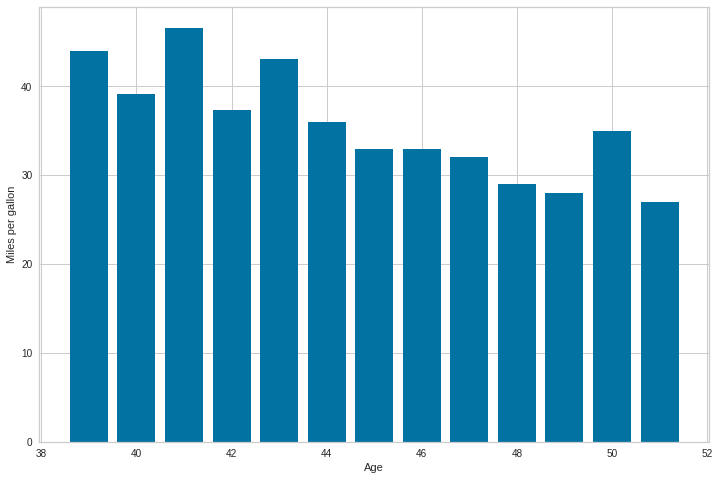

In [369]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

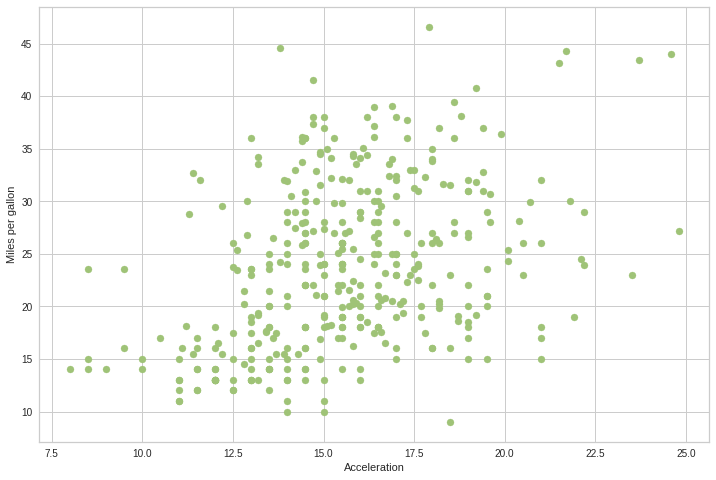

In [370]:
plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

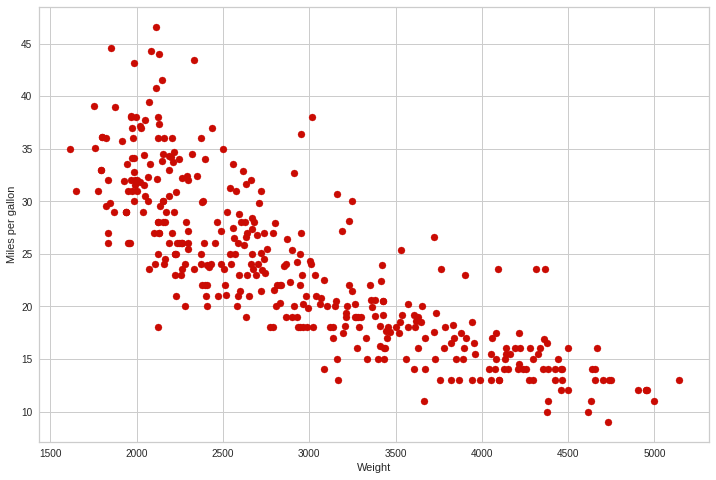

In [371]:
 plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

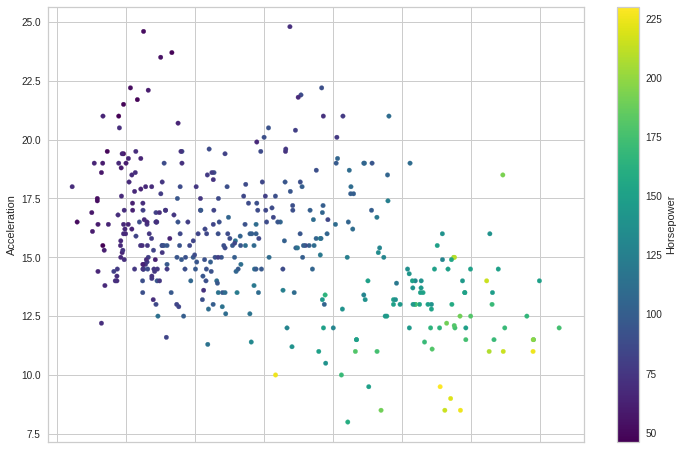

In [372]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(12,8));

Text(0, 0.5, 'Miles per gallon')

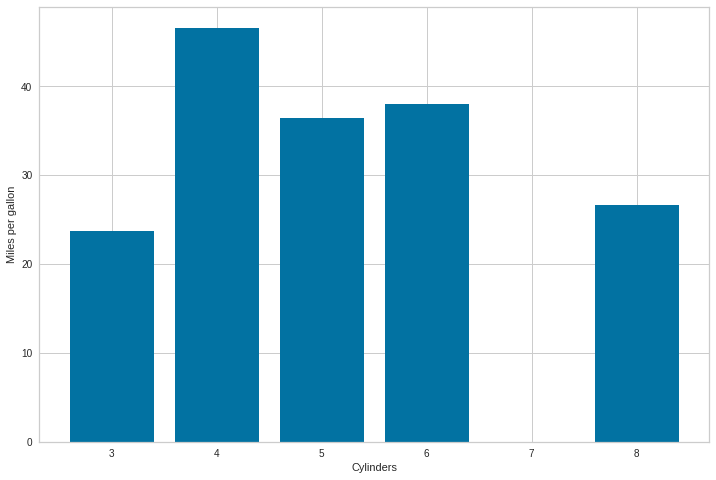

In [373]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [374]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
163,20.0,262.0,110,3221,13.5,46
16,18.0,199.0,97,2774,15.5,51
236,33.5,98.0,83,2075,15.9,44
222,15.0,302.0,130,4295,14.9,44
286,18.2,318.0,135,3830,15.2,42
223,17.5,250.0,110,3520,16.4,44
332,35.0,122.0,88,2500,15.1,41
242,43.1,90.0,48,1985,21.5,43
324,43.4,90.0,48,2335,23.7,41
268,21.1,134.0,95,2515,14.8,43


In [375]:
cars_corr = automobile_df.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


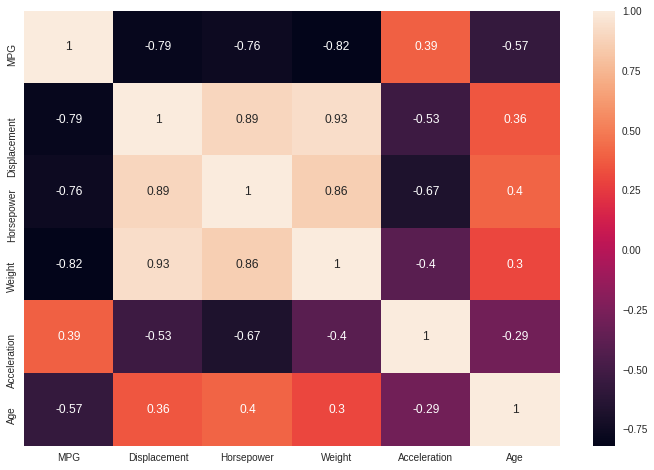

In [376]:
import seaborn as sns

fig, ax =plt.subplots(figsize = (12,8))

sns.heatmap(cars_corr, annot=True)

#Baseline Regression Model

In [377]:
import pandas as pd
import matplotlib.pyplot as plt

In [378]:
automobile_df = pd.read_csv('cars_processed.csv')

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [379]:
automobile_df.shape

(387, 8)

In [380]:
automobile_df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Origin', 'Age'],
      dtype='object')

In [381]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [382]:
automobile_df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.746023,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Cylinders,-0.746023,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,-0.788492,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


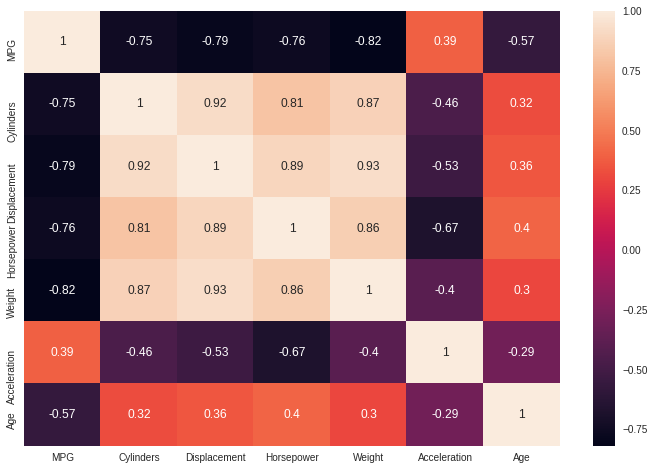

In [383]:
import seaborn as sns

fig, axs = plt.subplots(figsize = (12,8))

sns.heatmap(automobile_df.corr(), annot=True)

In [384]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [385]:
X = automobile_df[['Age']]
Y = automobile_df['MPG']

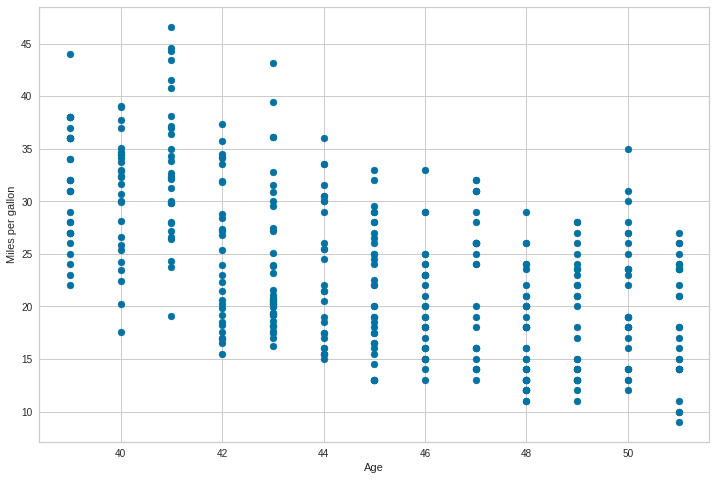

In [386]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

plt.show()

In [387]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [388]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [389]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.33123581204325425


In [390]:
y_pred = linear_model.predict(x_test)

In [391]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.26141308132682706


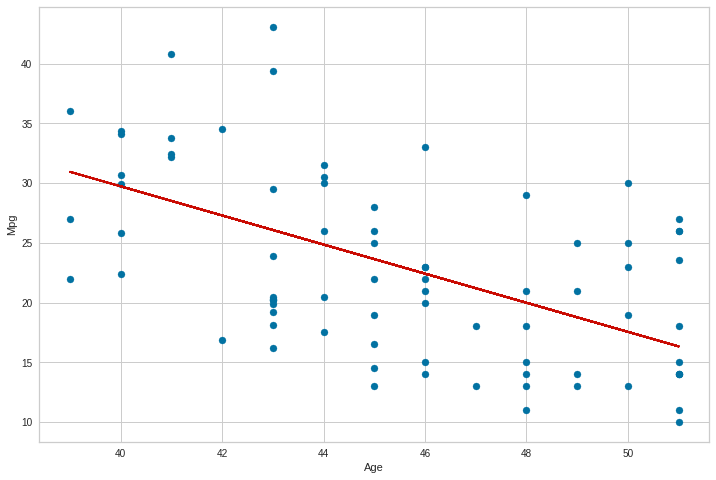

In [392]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [393]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.5790225885434479
Testing score:  0.5536699720214006


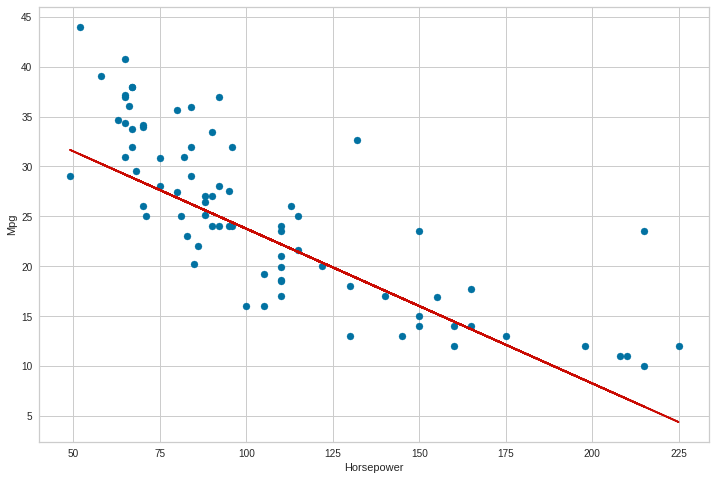

In [394]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [395]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [396]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,51,0,0,1
1,16.000000,8,304.0,150,3433,12.0,51,0,0,1
2,17.000000,8,302.0,140,3449,10.5,51,0,0,1
3,14.000000,8,454.0,220,4354,9.0,51,0,0,1
4,23.551429,8,440.0,215,4312,8.5,51,0,0,1


In [397]:
automobile_df.shape

(387, 10)

In [398]:
X = automobile_df.drop('MPG', axis=1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.8090660421335153
Testing score:  0.7774173470004682


#Univariate Feature Imputation

In [399]:
import pandas as pd
import numpy as np

In [400]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [401]:
diabetes.shape

(768, 9)

In [402]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [403]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [404]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [405]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [406]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [407]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [408]:
diabetes['Glucose'].replace(0, np.nan, inplace=True)
diabetes['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes['Insulin'].replace(0, np.nan, inplace=True)
diabetes['BMI'].replace(0, np.nan, inplace=True)

In [409]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [410]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [411]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [412]:
arr = diabetes['SkinThickness'].values.reshape(-1,1)

arr.shape

(768, 1)

In [413]:
from sklearn.impute import SimpleImputer

In [414]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(diabetes['SkinThickness'].values.reshape(-1,1))

diabetes['SkinThickness'] = imp.transform(diabetes['SkinThickness'].values.reshape(-1,1))

In [415]:
diabetes['SkinThickness'].describe()

count    768.000000
mean      29.994792
std        8.886506
min        7.000000
25%       25.000000
50%       32.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [416]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [417]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(diabetes['Glucose'].values.reshape(-1,1))

diabetes['Glucose'] = imp.transform(diabetes['Glucose'].values.reshape(-1,1))

In [418]:
diabetes['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [419]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [420]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(diabetes['BloodPressure'].values.reshape(-1,1))

diabetes['BloodPressure'] = imp.transform(diabetes['BloodPressure'].values.reshape(-1,1))

In [421]:
diabetes['BloodPressure'].describe()

count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [422]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [423]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=32)

imp.fit(diabetes['BMI'].values.reshape(-1,1))

diabetes['BMI'] = imp.transform(diabetes['BMI'].values.reshape(-1,1))

In [424]:
diabetes['BMI'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [425]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [426]:
diabetes.to_csv('diabetes_processed_incomplete.csv', index=False)

!ls

auto-mpg.csv		diabetes_processed.csv
auto_mpg_processed.csv	diabetes_processed_incomplete.csv
cars.csv		GoSales_Tx_LogisticRegression.csv
cars_processed.csv	sample_data
diabetes.csv


#Multivariate Feature Imputation

In [427]:
import pandas as pd
import numpy as np

In [428]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [429]:
imp = IterativeImputer(max_iter=100, random_state=0)

In [430]:
features = [[4, 2, 1],
            [24, 12, 6],
            [8, np.nan, 2],
            [28, 14, 7],
            [32, 16, np.nan],
            [600, 300, 150],
            [np.nan, 60, 30],
            [np.nan, np.nan, 1]]

In [431]:
imp.fit(features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [432]:
imp.transform(features)

array([[  4.   ,   2.   ,   1.   ],
       [ 24.   ,  12.   ,   6.   ],
       [  8.   ,   4.   ,   2.   ],
       [ 28.   ,  14.   ,   7.   ],
       [ 32.   ,  16.   ,   7.927],
       [600.   , 300.   , 150.   ],
       [120.003,  60.   ,  30.   ],
       [  5.59 ,   2.796,   1.   ]])

In [433]:
X_test = [[np.nan, 24, 12],
          [36, np.nan, np.nan],
          [100, np.nan, 25],
          [np.nan, 6, 3],
          [np.nan, 8, np.nan]]

In [434]:
imp.transform(X_test)

array([[ 48.004,  24.   ,  12.   ],
       [ 36.   ,  18.   ,   8.927],
       [100.   ,  50.   ,  25.   ],
       [ 12.004,   6.   ,   3.   ],
       [ 16.121,   8.   ,   5.862]])

In [435]:
diabetes = pd.read_csv('diabetes_processed_incomplete.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.000000,32.0,NaN,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,32.0,NaN,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,32.0,NaN,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,32.0,NaN,32.0,0.232,54,1


In [436]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [437]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,32.0,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [438]:
imp = IterativeImputer(max_iter=10000, random_state=0)

In [439]:
imp.fit(diabetes_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10000, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [440]:
diabetes_feature_arr = imp.transform(diabetes_features)

In [441]:
diabetes_feature_arr.shape

(768, 8)

In [442]:
diabetes_features = pd.DataFrame(diabetes_feature_arr, columns=diabetes_features.columns)

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [443]:
diabetes = pd.concat([diabetes_features, diabetes_label], axis=1)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [444]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [445]:
diabetes.to_csv('diabetes_processed.csv', index=False)

!ls

auto-mpg.csv		diabetes_processed.csv
auto_mpg_processed.csv	diabetes_processed_incomplete.csv
cars.csv		GoSales_Tx_LogisticRegression.csv
cars_processed.csv	sample_data
diabetes.csv


#Missing Indicator

In [446]:
import pandas as pd
import numpy as np

from sklearn.impute import MissingIndicator

In [447]:
features = [[4, 2, 1],
            [24, 12, 6],
            [8, 4, 2],
            [28, 14, 7],
            [32, 16, -1],
            [600, 300, 150],
            [-1, 60, 30],
            [-1, 4, 1]]

In [448]:
indicator = MissingIndicator(missing_values=-1)

In [449]:
mask_missing_values_only = indicator.fit_transform(features)

mask_missing_values_only

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False]])

In [450]:
indicator.features_

array([0, 2])

In [451]:
indicator = MissingIndicator(missing_values=-1, features="all")

In [452]:
mask_all = indicator.fit_transform(features)

mask_all

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [ True, False, False],
       [ True, False, False]])

In [453]:
indicator.features_

array([0, 1, 2])

#Feature Imputation Pipeline

In [454]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

In [455]:
diabetes = pd.read_csv('diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [456]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [457]:
mask = np.random.randint(0, 100, size=diabetes_features.shape).astype(np.bool)

mask = np.logical_not(mask)

In [458]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [459]:
diabetes_features[mask] = np.nan

diabetes_features.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
683,4.0,125.0,80.0,32.0,152.954841,32.3,0.536,27.0
675,6.0,195.0,70.0,32.0,305.093530,30.9,0.328,31.0
662,8.0,167.0,106.0,46.0,231.000000,37.6,0.165,43.0
388,5.0,144.0,82.0,26.0,285.000000,32.0,0.452,58.0
72,13.0,126.0,90.0,32.0,167.557273,43.4,0.583,42.0
550,1.0,116.0,70.0,28.0,129.779554,27.4,0.204,21.0
259,11.0,155.0,76.0,28.0,150.000000,33.3,1.353,51.0
555,7.0,124.0,70.0,33.0,NaN,25.5,0.161,37.0
158,2.0,88.0,74.0,19.0,53.000000,29.0,0.229,22.0
508,2.0,84.0,50.0,23.0,76.000000,30.4,0.968,21.0


In [460]:
diabetes_features.isnull().sum()

Pregnancies                 10
Glucose                      8
BloodPressure                5
SkinThickness                8
Insulin                      9
BMI                          9
DiabetesPedigreeFunction     9
Age                         12
dtype: int64

In [461]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [462]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_features, diabetes_label, test_size=0.2)

In [463]:
transformer = ColumnTransformer(
    transformers=[('features', SimpleImputer(strategy='mean'), [0, 1, 2, 3, 4, 5, 6, 7])]
)

In [464]:
clf = make_pipeline(transformer, DecisionTreeClassifier(max_depth=4))

In [465]:
clf = clf.fit(x_train, y_train)

clf.score(x_train, y_train)

0.7980456026058632

In [466]:
y_pred = clf.predict(x_test)

In [467]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7597402597402597

#Transforming Continuous and Categorical Data

##Feature Scaling


*   Scaling: Numeric values are shifted and rescaled so all features have the same scale. i.e. within the same minimum and maximum values
*   Standardization: Centers data around the mean and divides each value by the standard deviation so all features have 0 mean and unit variance


##Feature Scaling and Transformation

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [469]:
np.set_printoptions(precision=3)

In [470]:
diabetes = pd.read_csv('diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [471]:
features_df = diabetes.drop('Outcome', axis=1)
target_df = diabetes['Outcome']

features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [472]:
features_df.shape

(768, 8)

In [473]:
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [474]:
from sklearn.preprocessing import MinMaxScaler

In [475]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features_df)

In [476]:
rescaled_features.shape

(768, 8)

In [477]:
rescaled_features[1:5]

array([[0.059, 0.265, 0.429, 0.239, 0.101, 0.172, 0.117, 0.167],
       [0.471, 0.897, 0.408, 0.272, 0.333, 0.104, 0.254, 0.183],
       [0.059, 0.29 , 0.429, 0.174, 0.128, 0.202, 0.038, 0.   ],
       [0.   , 0.6  , 0.163, 0.304, 0.214, 0.509, 0.944, 0.2  ]])

In [478]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns)

rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


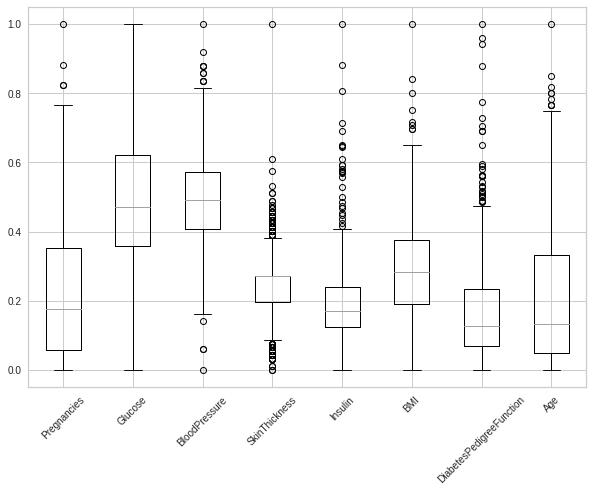

In [479]:
rescaled_features_df.boxplot(figsize=(10, 7), rot=45)

plt.show()

In [480]:
from sklearn.preprocessing import StandardScaler

In [481]:
scaler = StandardScaler()

scaler = scaler.fit(features_df)

standardized_features = scaler.transform(features_df)

In [482]:
type(standardized_features)

numpy.ndarray

In [483]:
standardized_features.shape

(768, 8)

In [484]:
standardized_features[0:5]

array([[ 0.64 ,  0.866, -0.034,  0.564,  0.682,  0.167,  0.468,  1.426],
       [-0.845, -1.205, -0.53 , -0.112, -0.849, -0.852, -0.365, -0.191],
       [ 1.234,  2.017, -0.695,  0.226,  1.212, -1.332,  0.604, -0.106],
       [-0.845, -1.074, -0.53 , -0.788, -0.605, -0.633, -0.921, -1.042],
       [-1.142,  0.504, -2.681,  0.564,  0.156,  1.55 ,  5.485, -0.02 ]])

In [485]:
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

standardized_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-4.474864e-16,3.850725e-17,1.590163e-18,4.803738e-16,2.491497e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


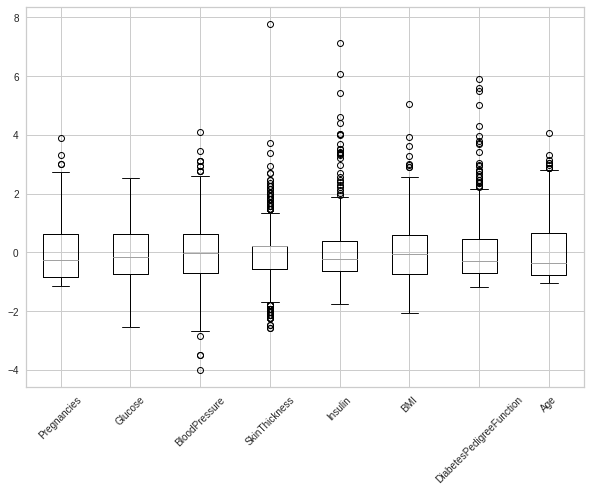

In [486]:
standardized_features_df.boxplot(figsize=(10,7), rot=45)
plt.show()

In [487]:
from sklearn.preprocessing import Normalizer

In [488]:
normalizer = Normalizer(norm='l1')

normalized_features = normalizer.fit_transform(features_df)

In [489]:
l1_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [490]:
l1_normalized_features_df.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [491]:
l1_normalized_features_df[0:1].transpose()

,0
Pregnancies,0.010633
Glucose,0.262293
BloodPressure,0.127602
SkinThickness,0.062029
Insulin,0.388172
BMI,0.059548
DiabetesPedigreeFunction,0.001111
Age,0.088612


In [492]:
l1_normalized_features_df.iloc[0].abs().sum()

1.0

In [493]:
normalizer = Normalizer(norm='l2')

normalized_features = normalizer.fit_transform(features_df)

l2_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [494]:
l2_normalized_features_df.iloc[0]

Pregnancies                 0.021220
Glucose                     0.523417
BloodPressure               0.254635
SkinThickness               0.123781
Insulin                     0.774616
BMI                         0.118830
DiabetesPedigreeFunction    0.002217
Age                         0.176830
Name: 0, dtype: float64

In [495]:
l2_normalized_features_df.iloc[0].abs().sum()

1.9955454056240292

In [496]:
l2_normalized_features_df.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273965
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600030
BMI                         0.014121
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [497]:
l2_normalized_features_df.iloc[0].pow(2).sum()

0.9999999999999998

In [498]:
normalizer = Normalizer(norm='max')

normalized_features = normalizer.fit_transform(features_df)

max_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

In [499]:
max_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


In [500]:
from sklearn.preprocessing import Binarizer

In [501]:
binarizer = Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))

binarized_features = binarizer.fit_transform(features_df[['Pregnancies']])

In [502]:
binarized_features[0:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [503]:
for i in range(1, features_df.shape[1]):

  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())).fit(features_df[[features_df.columns[i]]])

  new_binarized_feature = scaler.transform(features_df[[features_df.columns[i]]])

  binarized_features = np.concatenate((binarized_features, new_binarized_feature), axis=1)

In [504]:
binarized_features[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.]])

In [505]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [506]:
def build_model(X, Y, test_frac):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test Score: ", accuracy_score(y_test, y_pred))

In [507]:
build_model(rescaled_features, target_df, 0.2)

Test Score:  0.7922077922077922


In [508]:
build_model(standardized_features, target_df, 0.2)

Test Score:  0.7857142857142857


In [509]:
build_model(normalized_features, target_df, 0.2)

Test Score:  0.7402597402597403


In [510]:
build_model(binarized_features, target_df, 0.2)

Test Score:  0.7012987012987013


#Numeric Encoding of Categorical Data

##Categories as Nominal Data
Label encoding:

* Numeric ID for each category
* Single column suffices
* Numeric IDs present illusion of sortability
* Ideally should use only for ordinal categorical data

One-hot encoding:

* Separate column with 1 or 0 for presence or absence of each category
* ONot clearly sortable
* Can use for both nominal and ordinal categorical data

##Label Encoder and One-Hot Encoder

In [511]:
import pandas as pd

In [512]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
49052,False,F,26,Single,Professional
5671,False,F,31,Married,Other
44244,False,M,35,Unspecified,Trades
49470,False,M,23,Single,Sales
7287,False,F,27,Single,Other
56714,False,F,42,Married,Other
20568,False,M,20,Single,Student
39304,False,F,28,Single,Professional
18312,True,F,36,Married,Retail
10960,False,F,36,Married,Executive


In [513]:
gosales.columns

Index(['IS_TENT', 'GENDER', 'AGE', 'MARITAL_STATUS', 'PROFESSION'], dtype='object')

In [514]:
gosales.describe()

,AGE
count,60252.000000
mean,34.187479
std,10.105477
min,17.000000
25%,26.000000
50%,33.000000
75%,41.000000
max,69.000000


In [515]:
gosales.isnull().sum()

IS_TENT           0
GENDER            0
AGE               0
MARITAL_STATUS    0
PROFESSION        0
dtype: int64

In [516]:
gosales.shape

(60252, 5)

In [517]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

In [518]:
import matplotlib.pyplot as plt

In [519]:
pd.value_counts(gosales['IS_TENT'])

False    54241
True      6011
Name: IS_TENT, dtype: int64

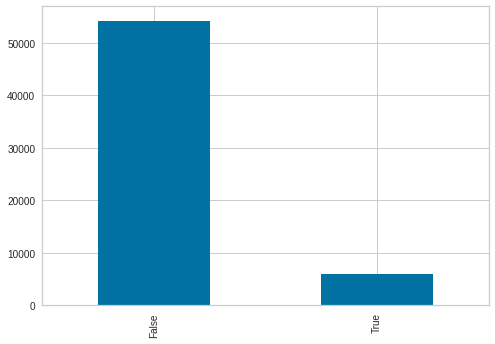

In [520]:
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

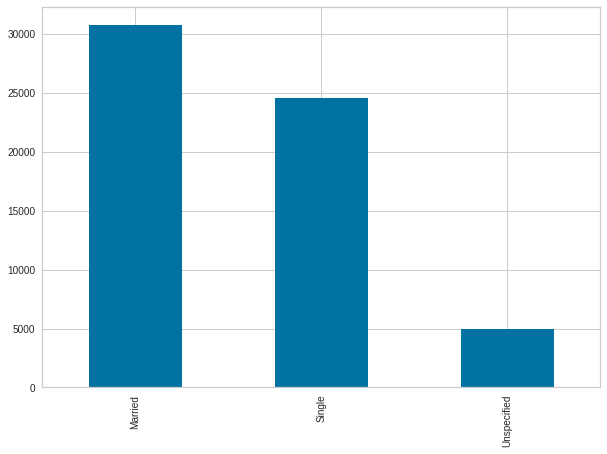

In [521]:
plt.figure(figsize=(10, 7))

pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()

plt.show()

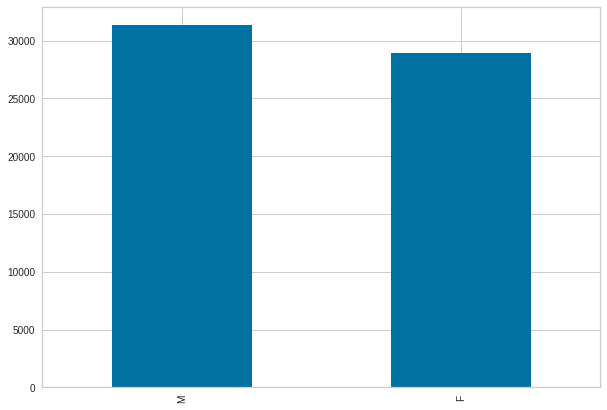

In [522]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

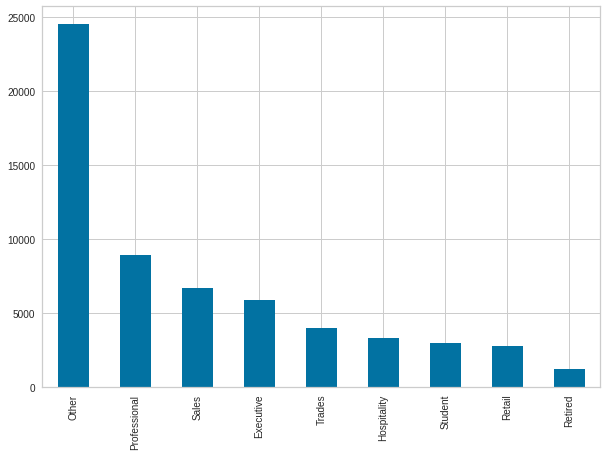

In [523]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

In [524]:
gender = ['M', 'F']

In [525]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(gender)

In [526]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [527]:
label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [528]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
7464,False,0,21,Single,Other
4394,False,1,36,Married,Other
529,False,1,32,Married,Executive
12150,True,0,38,Married,Other
13806,False,1,20,Single,Other
41119,False,1,28,Unspecified,Other
8346,False,0,28,Single,Retail
7850,False,1,33,Unspecified,Professional
15426,False,1,41,Married,Trades
46222,False,1,44,Married,Sales


In [529]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
28393,Married
48462,Single
25345,Married
21762,Married
34372,Single


In [530]:
  one_hot_encoding = preprocessing.OneHotEncoder()

  one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [531]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [532]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()

one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [533]:
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head()

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [534]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [535]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
53222,False,0,36,Other,1.0,0.0,0.0
10610,False,0,31,Other,1.0,0.0,0.0
38307,False,1,21,Student,0.0,1.0,0.0
56066,False,0,22,Professional,0.0,1.0,0.0
17072,False,1,30,Sales,1.0,0.0,0.0
48148,False,0,44,Retired,1.0,0.0,0.0
19107,False,0,29,Other,0.0,1.0,0.0
13930,False,0,37,Hospitality,0.0,0.0,1.0
23241,True,1,26,Other,0.0,1.0,0.0
44398,False,1,38,Sales,0.0,1.0,0.0


In [536]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
34213,False,1,44,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0
8636,False,0,34,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
15509,False,0,23,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
31911,False,0,29,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
20397,False,0,36,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0
33247,False,1,43,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
4812,False,0,29,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
46722,False,1,19,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0
41003,False,1,24,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
59233,False,1,20,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0


In [537]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
57575,False,F,32,Married,Other
24011,False,M,34,Married,Sales
37978,False,M,23,Single,Professional
48615,False,M,58,Married,Professional
52814,False,F,39,Single,Retail
27952,True,F,33,Married,Executive
1792,False,F,27,Single,Other
3498,False,M,20,Single,Student
38329,False,M,41,Married,Retired
5631,False,M,44,Married,Executive


In [538]:
gosales = pd.get_dummies(gosales)

gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
41596,False,26,1,0,1,0,0,0,0,0,0,0,0,1,0,0
46130,False,19,0,1,0,1,0,0,0,0,0,0,0,0,1,0
15029,False,20,0,1,0,1,0,0,0,0,0,0,0,1,0,0
57346,False,25,0,1,0,1,0,0,0,1,0,0,0,0,0,0
24067,False,42,0,1,1,0,0,0,0,1,0,0,0,0,0,0
12312,False,54,0,1,0,0,1,0,0,1,0,0,0,0,0,0
26919,False,36,1,0,1,0,0,0,0,0,1,0,0,0,0,0
39499,False,23,1,0,0,1,0,0,0,1,0,0,0,0,0,0
14802,False,38,0,1,1,0,0,0,0,0,0,0,0,1,0,0
9646,True,34,1,0,1,0,0,1,0,0,0,0,0,0,0,0


##Discretization / Bucketization of Data

In [539]:
import pandas as pd
import numpy as np

In [540]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

In [541]:
categories = pd.cut(X, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [542]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [543]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [544]:
categories.ordered

True

In [545]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [546]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [547]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [548]:
categories

['good', 'poor', 'poor', 'excellent', 'average', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [549]:
from sklearn.preprocessing import KBinsDiscretizer

In [550]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

In [551]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [552]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [553]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [554]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [555]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [  9, 30, -5],
     [  0, 24, -17]]

In [556]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [557]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='quantile')

In [558]:
X_trans = enc.transform(X)

X_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [559]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [560]:
enc.inverse_transform(X_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

In [561]:
automobile_df = pd.read_csv('auto_mpg_processed.csv')

automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [562]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

In [563]:
X.sample(10)

,Horsepower
360,84
214,145
70,150
235,48
57,86
368,70
80,175
180,120
112,112
82,145


In [564]:
import matplotlib.pyplot as plt

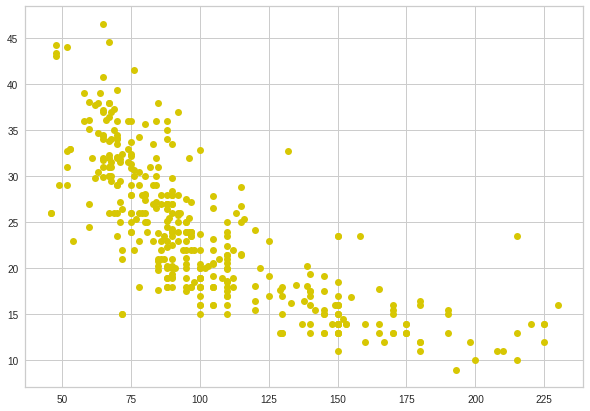

In [565]:
plt.figure(figsize=(10, 7))

plt.plot(X, Y, 'o', c='y')
plt.show()

In [566]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [567]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [568]:
reg = LinearRegression().fit(x_train, y_train)

In [569]:
y_pred = reg.predict(x_test)

y_pred

array([32.636, 29.004, 32.32 , 16.212, 29.635,  8.316, 26.003, 28.846,
       26.161,  8.632, 26.477, 28.056, 24.74 , 15.739, 12.264, 26.003,
       27.267, 24.108, 25.687, 28.688, 15.423, 21.739, 25.372, 31.688,
       24.582, 24.582, 28.846, 28.056, 25.372, 12.264, 31.372, 26.477,
       23.319, 28.688, 23.319, 28.846, 28.214, 26.477, 23.319, 12.264,
       28.056, 16.528, 20.95 , 26.319, 31.53 , 25.529, 22.529, 24.108,
       24.898, 16.212, 20.16 , 26.951, 17.002,  4.368, 32.32 , 24.74 ,
       22.213, 24.108, 27.267, 28.056, 22.529, 26.003, 25.687, 29.635,
       20.95 , 30.425, 24.108, 30.109,  5.948, 28.846,  4.368, 16.212,
       29.635, 22.213, 22.529, 27.582, 24.108, 29.793])

In [570]:
from sklearn.metrics import r2_score

In [571]:
r2_score(y_test, y_pred)

0.5535861263734922

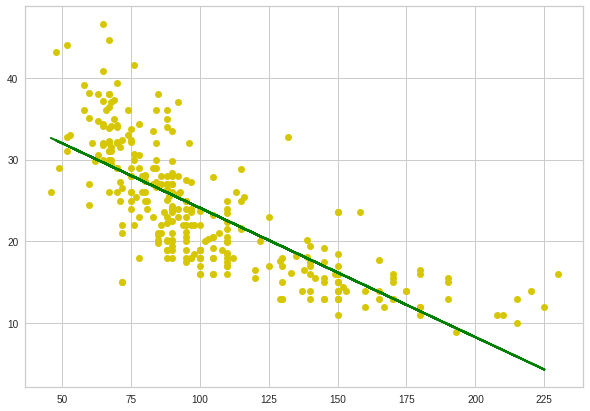

In [572]:
plt.figure(figsize=(10, 7))

plt.plot(x_train, y_train, 'o', c='y')

plt.plot(x_test, y_pred, linewidth=2, color='green', linestyle='-', label='linear regression')

plt.show()

In [573]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')

x_binned = enc.fit_transform(x_train)

In [574]:
x_binned[:10]

array([[ 9.],
       [ 5.],
       [16.],
       [19.],
       [14.],
       [ 2.],
       [ 6.],
       [16.],
       [ 9.],
       [13.]])

In [575]:
x_test_binned = enc.transform(x_test)

In [576]:
reg = LinearRegression().fit(x_binned, y_train)

In [577]:
y_pred = reg.predict(x_test_binned)

y_pred

array([34.057, 31.878, 34.057, 15.538, 32.967, 13.359, 25.342, 30.789,
       26.431, 13.359, 26.431, 29.699, 23.163, 14.449, 14.449, 25.342,
       28.61 , 20.985, 24.253, 30.789, 14.449, 18.806, 23.163, 34.057,
       22.074, 22.074, 30.789, 29.699, 23.163, 14.449, 34.057, 26.431,
       19.895, 30.789, 19.895, 30.789, 29.699, 26.431, 19.895, 14.449,
       29.699, 16.627, 18.806, 26.431, 34.057, 24.253, 18.806, 20.985,
       23.163, 15.538, 18.806, 27.521, 16.627, 13.359, 34.057, 23.163,
       18.806, 20.985, 28.61 , 29.699, 18.806, 25.342, 24.253, 32.967,
       18.806, 34.057, 20.985, 34.057, 13.359, 30.789, 13.359, 15.538,
       32.967, 18.806, 18.806, 28.61 , 20.985, 32.967])

In [578]:
r2_score(y_test, y_pred)

0.682105012837426

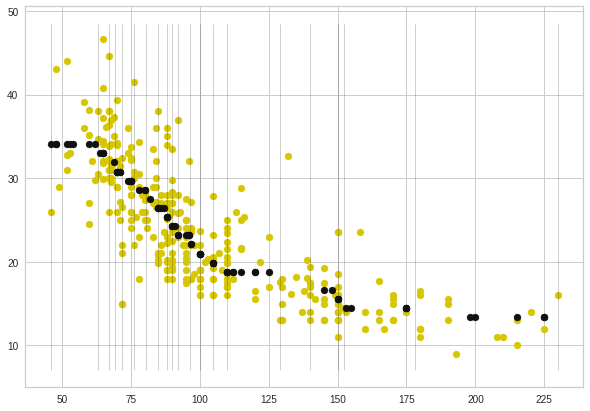

In [579]:
plt.figure(figsize=(10, 7))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()

#Understanding Feature Selection

##The Curse of Dimensionality

As number of x variables grows, several problems arise

* Problems in Visualization
* Problems in Training
* Problems in Prediction

Problems in Visualization:

EDA (Exploratory Data Analysis) is an essential precursor to model building

Essential for
* Identifying Outliers
* Detecting Anomolies
* Choosing Functional Form of Relationships

2-D visualizations are powerful aids in EDA

Even 3-D data is hard to meaningfully visualize

Higher dimensional data is often imperfectly explored prior to ML

Problems in Training:

Training is the process of finding best model parameters

Complex models have thousands of parameter values

During the training, all of these thousands of parameter values, especially neural networks, have to converge to the right model parameter value and this convergence takes time

Training for too little time leads to bad models

Number of parameters to be found grows rapidly with dimensionality

Extremely time-consuming training process

For on-cloud training, also extremely expensive

Problems in Predcition:

Prediction involves finding training instances similar to test instance

As dimensionality grows, size of search space explodes

Higher the number of x variables, higher the risk of overfitting

An easier problem to solve:

* Feature Selection: Deciding which data is actually relevant
* Feature Engineering: Aggregating very low-level data into useful features
* Dimensionality Reduction: Reduce complexity without losing information

##Reducing Complexity
* Feature Selection
  * Filter Methods
  * Wrapper Methods
  * Embedded Methods
* Dimensionality Reduction
  * Projection
  * Mainfold Learning
  * Autoencoding




Projection - Find new, better axes and re-orient data
e.g. Principle Component Analysis (PCA), Factor Analysis, Linear Discriminate Analysis (LDA), Quadratic Discriminate Analysis (QDA)

Maniforld Learning - Unroll the data so that twists and turns are smoothened out
Works best when data lies along a rolled-up surface such as a Swiss Roll or S-curve
e.g. Multidimensional Scaling (MDS), Isomap, Locally Linear Embedding (LLE), Kernel PCA

Autoencoding - Build neural networks to simplify the data
Extract efficient representations of complex data

Drawbacks of Reducing Complexity:
* Loss of information
* Performance degradation
* Computational intensive
* Complex pipelines
* Transformed features hard to interpret


***Feature Selection

Use case:
* Many X-Variables
* Most of which contain little information
* Some of which are very meaningful
* Meaningful variables are independent of each other

Filter Methods:
* Features (columns) selected independently of choice of model
* Rely on the statistical properties of the features
* Either individually (univariate) or jointly (multi-variate)

Embedded Methods:
* Features (columns) are selected during model training
* Feature selection effectively embedded within modelling
* Only specific types of models perform feature selection

Wrapper Methods:
* Somewhere between filter and embedded feature selection
* Features are chosen by building different candidate models
* e.g. Forward and backward stepwise regression
* Computationally intensive
* Each candidate model has different subset of features
* However all candidate models are similar in structure
* Features may be added or dropped to see whether the model improves

*** Filter Methods for Feature Seletion

Statistical Techniques:

* Variance Thresholding - choose only those features which have a high variance (features that have a higher variance contain more information)
* Chi-square test - allows you to test whether two variables X and Y are independent of one another. If you have a variable X that is independent of Y, X obviously has no predictive power to predict Y
* ANOVA (ANalysis Of VAriance) - a very popular hypothesis testing technique 
* Mutual Information between variables - amount of information you can glean from one variable by observing another random variable


Variance Thresholding:

If all points have the same value for an X-variable, that variable adds no information. Extend this idea and drop columns with variance below a minimum threshold.

Chi-square Feature Selection:

For each X-variable, use the Chi-square test to evaluate whether that variable and Y are independent. If yes, drop that feature. Used for categorical X and Y.

* Does the observed data deviate from those expected in a particular analysis?
* Test the effect of one variable on the outcome, univariate analysis
* Sum of the squared difference between observed and expected data in all categories

ANOVA:

Looks across multiple groups of populations and compares their means to produce one score and one significance value

For each X-variable, use the ANOVA F-test to check whether mean of Y cateogry varies for each distinct value of X. If not, drop that X-variable

Mutual Information:

Measures the amount of information obtained on random variable by observing another

* Conceptually similar to using ANOVA F-test for feature selection
* Superior as it also captures non-linear dependencies (unlike ANOVA-based feature selection)

***Embedded Methods for Feature Selection

Some machine learning algorithms automatically perform feature selection
* Decision Tress
* Lasso Regression


Decision trees set up a tree structure on training data which helps make decisions based on rules
* Fit knowledge into rules
* Each rule involves a threshold
* Order of decision variable matters
* Rules and order found using ML
* Order determines feature importance

Lasso Regression


A new term gets added to the regression equation --> Regularization term / Penalty

In the case of lasso regression, the penalty term is the L-1 norm of regression coefficients (the sum of the absolute values of all of the regression coefficients multiplied by an alpha which determines the strength of the penalty)

#Implementing Feature Selection

##Calculating and visualizing features correlations in data

In [580]:
import yellowbrick

##Yellowbrick:
An open source python project which extends the scikit-learn API with visual analysis and diagnostic tools that help model selection

In [581]:
import pandas as pd
import matplotlib.pyplot as plt

In [582]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [583]:
diabetes_corr = diabetes.corr()

diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


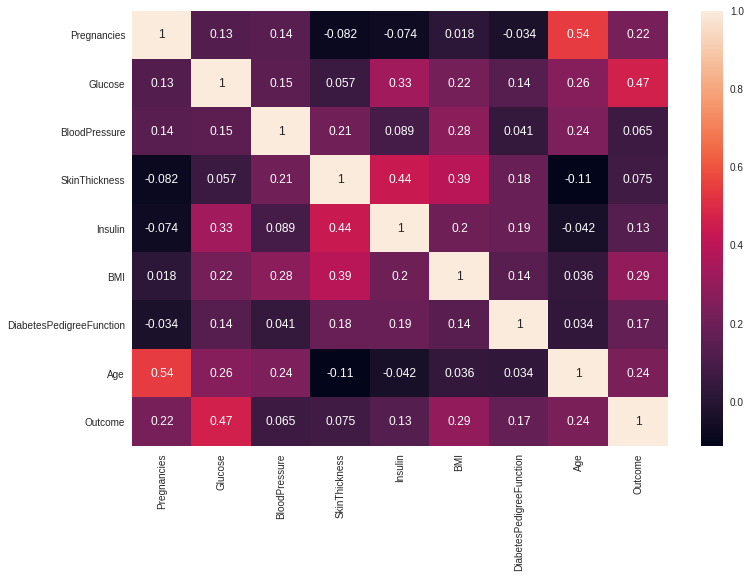

In [584]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_corr, annot=True)
plt.show()

In [585]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]

Y= diabetes['Age']

In [586]:
feature_names = X.columns

feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


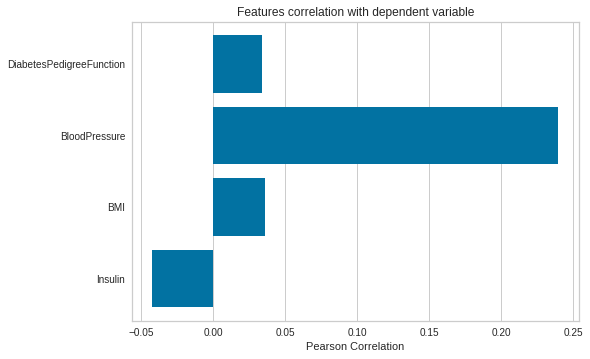

In [587]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X,Y)
visualizer.poof()

In [588]:
visualizer.scores_

array([-0.042,  0.036,  0.24 ,  0.034])

In [589]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [590]:
scores_df = pd.DataFrame({"Feature Names" : visualizer.features_,
                         "Score" : visualizer.scores_})

scores_df

,Feature Names,Score
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


In [591]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [592]:
feature_names = X.columns

feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


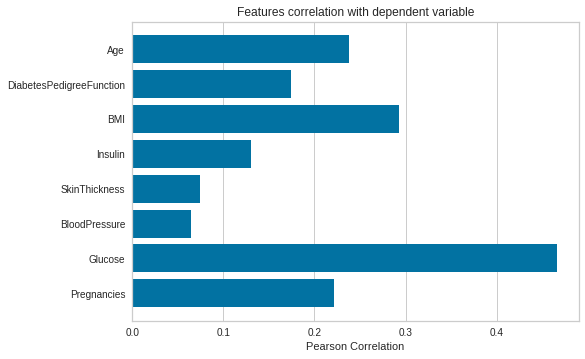

In [593]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [594]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


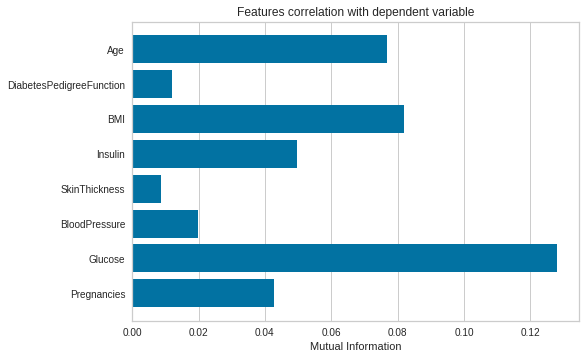

In [595]:
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(labels=feature_names, method='mutual_info-classification')
visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

In [596]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


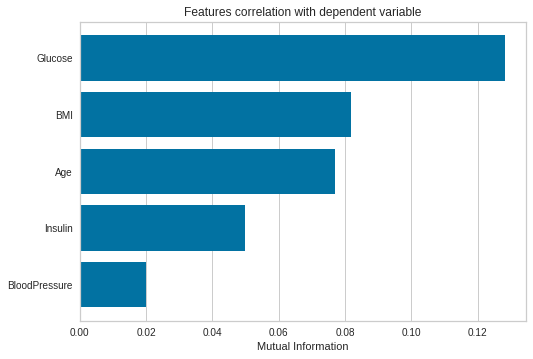

In [597]:
visualizer = FeatureCorrelation(method='mutual_info-classification', feature_names=feature_to_plot, sort=True)

visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

##Detecting and handling multicollinearity in data

###Multicollinear
One or more of your input features can be represented as linear combination of other features where your model is not going to be very robust

In [598]:
import pandas as pd

In [599]:
automobile = pd.read_csv('cars_processed.csv')

automobile.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [600]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [601]:
from sklearn import preprocessing

automobile[['Cylinders']] = preprocessing.scale(automobile[['Cylinders']].astype('float64'))
automobile[['Displacement']] = preprocessing.scale(automobile[['Displacement']].astype('float64'))
automobile[['Horsepower']] = preprocessing.scale(automobile[['Horsepower']].astype('float64'))
automobile[['Weight']] = preprocessing.scale(automobile[['Weight']].astype('float64'))
automobile[['Acceleration']] = preprocessing.scale(automobile[['Acceleration']].astype('float64'))
automobile[['Age']] = preprocessing.scale(automobile[['Age']].astype('float64'))

In [602]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02
mean,23.672514,1.095879e-16,8.778508e-17,-1.061454e-17,-2.008155e-18,2.662240e-16,5.817913e-16
std,7.736579,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00
min,9.000000,-1.447404e+00,-1.199046e+00,-1.513838e+00,-1.600007e+00,-2.761372e+00,-1.615000e+00
25%,17.600000,-8.470340e-01,-8.659368e-01,-7.522710e-01,-8.800918e-01,-6.102152e-01,-7.962160e-01
50%,23.200000,-8.470340e-01,-4.459295e-01,-3.058349e-01,-2.075007e-01,-2.685060e-02,2.256768e-02
75%,29.000000,3.537065e-01,6.547792e-01,4.557326e-01,7.383860e-01,5.382839e-01,8.413513e-01
max,46.600000,1.554447e+00,2.537570e+00,3.318176e+00,2.572779e+00,3.363956e+00,1.660135e+00


###Scale
All features now have a mean of 0 and standard deviation of 1

In [603]:
automobile.shape

(387, 8)

In [604]:
from sklearn.model_selection import train_test_split

In [605]:
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [606]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [607]:
print("Training Score : ", linear_model.score(x_train, y_train))

Training Score :  0.7946501051868443


In [608]:
y_pred = linear_model.predict(x_test)

In [609]:
from sklearn.metrics import r2_score

print("Testing Score : ", r2_score(y_test, y_pred))

Testing Score :  0.7495197986324571


###Adjusted R Square
When you have multiple predictors or multiple features in your regression model, a better measure of how good your model is, is the adjusted r square score (adjusted r2_score)

In [610]:
def adjusted_r2(r_square, labels, features):
  
  adj_r_square = 1 - ((1-r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)

  return adj_r_square

In [611]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7283524576718197


In [612]:
features_corr = X.corr()

features_corr

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


In [613]:
abs(features_corr) > 0.8

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,True,True,True,True,False,False
Displacement,True,True,True,True,False,False
Horsepower,True,True,True,True,False,False
Weight,True,True,True,True,False,False
Acceleration,False,False,False,False,True,False
Age,False,False,False,False,False,True


In [614]:
trimmed_features_df = X.drop(['Cylinders', 'Displacement', 'Weight'], axis=1)

In [615]:
trimmed_features_corr = trimmed_features_df.corr()

trimmed_features_corr

,Horsepower,Acceleration,Age
Horsepower,1.000000,-0.670920,0.404458
Acceleration,-0.670920,1.000000,-0.292705
Age,0.404458,-0.292705,1.000000


In [616]:
abs(trimmed_features_corr) > 0.8

,Horsepower,Acceleration,Age
Horsepower,True,False,False
Acceleration,False,True,False
Age,False,False,True


###Variance Inflation Factor
A meausre to quantify the severity of multicollinearity in an ordinary least square regression analysis

In [617]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [618]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [619]:
vif["features"] = X.columns

In [620]:
vif.round(2)

,VIF Factor,features
0,6.84,Cylinders
1,16.10,Displacement
2,8.82,Horsepower
3,10.69,Weight
4,2.49,Acceleration
5,1.22,Age


###VIF Values
A VIF of one indicates that a feature is not correlated with the other features.

A value between one and five indicates that a feature is moderately correlated with other features.

A value greater than five indicates that a feature is highly correlated with the other features in our data set.


In [621]:
X = X.drop(['Displacement', 'Weight'], axis=1)

In [622]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [623]:
vif["features"] = X.columns

In [624]:
vif.round(2)

,VIF Factor,features
0,3.05,Cylinders
1,4.56,Horsepower
2,1.90,Acceleration
3,1.20,Age


In [625]:
X = automobile.drop(['MPG', 'Displacement', 'Weight', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [626]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [627]:
print("Training Score : ", linear_model.score(x_train, y_train))

Training Score :  0.7123759327650959


In [628]:
y_pred = linear_model.predict(x_test)

In [629]:
print("Testing Score : ", r2_score(y_test, y_pred))

Testing Score :  0.7611249234805362


In [630]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7480358781917984


##Performing feature selection using a missing values threshold and a variance threshold

In [631]:
import pandas as pd
import numpy as np

In [632]:
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [633]:
diabetes_data['Glucose'].replace(0, np.nan, inplace=True)
diabetes_data['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes_data['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes_data['Insulin'].replace(0, np.nan, inplace=True)
diabetes_data['BMI'].replace(0, np.nan, inplace=True)

In [634]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [635]:
diabetes_data['Glucose'].isnull().sum() / len(diabetes_data) * 100

0.6510416666666667

In [636]:
diabetes_data['BloodPressure'].isnull().sum() / len(diabetes_data) * 100

4.557291666666666

In [637]:
diabetes_data['SkinThickness'].isnull().sum() / len(diabetes_data) * 100

29.557291666666668

In [638]:
diabetes_data['Insulin'].isnull().sum() / len(diabetes_data) * 100

48.69791666666667

In [639]:
diabetes_data['BMI'].isnull().sum() / len(diabetes_data) * 100

1.4322916666666665

In [640]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [641]:
diabetes_data_trimmed = diabetes_data.dropna(thresh=int(diabetes_data.shape[0] * 0.9), axis=1)

diabetes_data_trimmed.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [643]:
diabetes_data = pd.read_csv('diabetes_processed.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [644]:
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']

In [645]:
X.var(axis=0)

Pregnancies                   11.354056
Glucose                      926.489244
BloodPressure                146.321591
SkinThickness                 78.969986
Insulin                     9449.130490
BMI                           47.270664
DiabetesPedigreeFunction       0.109779
Age                          138.303046
dtype: float64

In [646]:
from sklearn.preprocessing import minmax_scale

X_scaled = pd.DataFrame(minmax_scale(X, feature_range=(0,10)), columns=X.columns)

In [647]:
X_scaled.var()

Pregnancies                 3.928739
Glucose                     3.856355
BloodPressure               1.523548
SkinThickness               0.933010
Insulin                     1.270004
BMI                         1.976851
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

In [648]:
X_scaled.var(axis=0)

Pregnancies                 3.928739
Glucose                     3.856355
BloodPressure               1.523548
SkinThickness               0.933010
Insulin                     1.270004
BMI                         1.976851
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

In [649]:
from sklearn.feature_selection import VarianceThreshold

select_features = VarianceThreshold(threshold = 1.0)

In [650]:
X_new = select_features.fit_transform(X_scaled)

In [651]:
X_scaled.shape

(768, 8)

In [652]:
X_new.shape

(768, 7)

In [653]:
var_df = pd.DataFrame({'Feature Names': list(X_scaled),
                       'Variances' : select_features.variances_
                       })

var_df

,Feature Names,Variances
0,Pregnancies,3.923624
1,Glucose,3.851334
2,BloodPressure,1.521565
3,SkinThickness,0.931795
4,Insulin,1.268350
5,BMI,1.974277
6,DiabetesPedigreeFunction,1.998841
7,Age,3.836749


In [654]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5,6
0,3.529412,6.709677,4.897959,2.731339,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.007569,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.328912,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.281848,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.139752,5.092025,9.436379,2.000000


In [655]:
selected_features = []

for i in range(len(X_new.columns)):
  for j in range(len(X_scaled.columns)):

    if(X_new.iloc[:,i].equals(X_scaled.iloc[:,j])):
      selected_features.append(X_scaled.columns[j])


selected_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

##Performing feature selection using univariate statistical analysis

###Univariate Selection
when we examine each feature individually to determine the strength of the relationship of that feature to our target value

In [656]:
import pandas as pd
import numpy as np

In [657]:
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [659]:
def get_selected_features(X, X_new):
  selected_features = []

  for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):

      if(X_new.iloc[:,i].equals(X.iloc[:,j])):
        print(X.columns[j])
        selected_features.append(X.columns[j])
      
  return selected_features

In [660]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

###Chi-Square Test
a measure of dependency between variables - use this relationship to determine the most relevant features for classification

The Chi-square test gives us a goodness of fit measure because it measures how well the observed distribution of a particular variable fits with the distribution that is expected if two variables are independent

In [661]:
X = diabetes_data.drop('Outcome', axis=1)

Y = diabetes_data['Outcome']

In [662]:
X.shape

(768, 8)

In [663]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [664]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [665]:
X = X.astype(np.float64)

In [666]:
test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(X, Y)

In [667]:
fit.scores_

array([ 111.52 , 1411.887,   17.605,   53.108, 2175.565,  127.669,
          5.393,  181.304])

In [669]:
feature_score = pd.DataFrame()

for i in range(X.shape[1]):
  new = pd.DataFrame({'Features' : X.columns[i],
                       'Score' : fit.scores_[i]}, index=[i])
  
  feature_score = pd.concat([feature_score, new])

In [670]:
feature_score

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [671]:
X_new = fit.transform(X)

In [672]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [673]:
selected_features = get_selected_features(X, X_new)

selected_features

Glucose
Insulin
BMI
Age


['Glucose', 'Insulin', 'BMI', 'Age']

In [674]:
X[selected_features].head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [675]:
chi2_best_features = X[selected_features]

In [676]:
from sklearn.feature_selection import f_classif, SelectPercentile

test = SelectPercentile(f_classif, percentile=80)

fit = test.fit(X, Y)

###ANOVA F-Value
Use the ANOVA F-value as a measure of dependency - use this relationship to determine the most relevant features for classification

In [677]:
fit.scores_

array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
        46.141])

In [678]:
X_new = fit.transform(X)

In [679]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5
0,6.0,148.0,0.0,33.6,0.627,50.0
1,1.0,85.0,0.0,26.6,0.351,31.0
2,8.0,183.0,0.0,23.3,0.672,32.0
3,1.0,89.0,94.0,28.1,0.167,21.0
4,0.0,137.0,168.0,43.1,2.288,33.0


In [680]:
selected_features = get_selected_features(X, X_new)

selected_features

Pregnancies
Glucose
Insulin
BMI
DiabetesPedigreeFunction
Age


['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [681]:
f_classif_best_features = X[selected_features]

In [683]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [684]:
def build_model(X, Y, test_frac):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test Score : ", accuracy_score(y_test, y_pred))


In [692]:
build_model(X, Y, 0.2)

Test Score :  0.7532467532467533


In [693]:
build_model(chi2_best_features, Y, 0.2)

Test Score :  0.7857142857142857


In [695]:
build_model(f_classif_best_features, Y, 0.2)

Test Score :  0.7597402597402597


##Performing feature selection using wrapper method

* Recursive feature elimination
* Forward selection
* Backward selection

In [696]:
import mlxtend

In [697]:
import pandas as pd
import numpy as np

In [698]:
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [699]:
X = diabetes_data.drop('Outcome', axis=1)

Y = diabetes_data['Outcome']

In [700]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

###RFE - Recursive Feature Elimination
Selects features by recursively considering smaller subsets of features by pruning the least important feature at each step

In [701]:
model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=4)

In [702]:
fit = rfe.fit(X, Y)

In [704]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  4
Selected Features:  [ True  True False False False  True  True False]
Feature Ranking:  [1 1 2 4 5 1 1 3]


In [705]:
feature_rank = pd.DataFrame({'columns': X.columns,
                             'ranking': fit.ranking_,
                             'selected': fit.support_})

feature_rank

,columns,ranking,selected
0,Pregnancies,1,True
1,Glucose,1,True
2,BloodPressure,2,False
3,SkinThickness,4,False
4,Insulin,5,False
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True
7,Age,3,False


In [706]:
recursive_feature_names = feature_rank.loc[feature_rank['selected'] == True]

recursive_feature_names

,columns,ranking,selected
0,Pregnancies,1,True
1,Glucose,1,True
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True


In [707]:
X[recursive_feature_names['columns'].values].head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288


In [735]:
recursive_features = X[recursive_feature_names['columns'].values]

###Sequential Feature Selector
Selects important features in a sequential manner

Add or remove one variable at a time based on the performance of the classifier till we get to the specified number of features

In [708]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [709]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=10),
                                             k_features=4,
                                             forward=True,
                                             scoring='accuracy',
                                             cv=4)

features = feature_selector.fit(np.array(X), Y)

In [711]:
features.k_feature_idx_

(1, 3, 5, 6)

In [710]:
forward_elimination_feature_names = list(X.columns[list(features.k_feature_idx_)])

forward_elimination_feature_names

['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

In [712]:
forward_elimination_features = X[forward_elimination_feature_names]

In [726]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=10),
                                             k_features=4,
                                             forward=False,
                                             scoring='accuracy',
                                             cv=4)

features = feature_selector.fit(np.array(X), Y)

In [727]:
back_elimination_feature_names = list(X.columns[list(features.k_feature_idx_)])

back_elimination_feature_names

['Glucose', 'BloodPressure', 'BMI', 'Age']

In [728]:
back_elimination_features = X[back_elimination_feature_names]

In [730]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [731]:
def build_model(X, Y, test_frac):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test Score : ", accuracy_score(y_test, y_pred))

In [732]:
build_model(X, Y, 0.2)

Test Score :  0.8376623376623377


In [736]:
build_model(recursive_features, Y, 0.2)

Test Score :  0.7727272727272727


In [737]:
build_model(forward_elimination_features, Y, 0.2)

Test Score :  0.7857142857142857


In [738]:
build_model(back_elimination_features, Y, 0.2)

Test Score :  0.7792207792207793


##Performing feature selection using embedded methods

In [739]:
import pandas as pd
import numpy as np

In [740]:
automobile = pd.read_csv('cars_processed.csv')

automobile.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51
5,14.000000,8,455.0,225,4425,8.5,US,51
6,15.000000,8,390.0,190,3850,8.5,US,51
7,15.000000,8,383.0,170,3563,10.0,US,51
8,14.000000,5,340.0,160,3609,8.0,US,51
9,23.551429,8,400.0,150,3761,9.5,US,51


In [741]:
X = automobile.drop(['MPG', 'Origin'], axis=1)

Y = automobile['MPG']

In [742]:
from sklearn.linear_model import Lasso

In [743]:
lasso = Lasso(alpha=0.8)
lasso.fit(X, Y)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [744]:
predictors = X.columns

coef = pd.Series(lasso.coef_, predictors).sort_values()
print(coef)

Age            -0.673784
Weight         -0.006603
Horsepower     -0.004511
Cylinders      -0.000000
Acceleration    0.000000
Displacement    0.001366
dtype: float64


In [745]:
lasso_features = ['Age', 'Weight']

X[lasso_features].head()

,Age,Weight
0,51,3504
1,51,3433
2,51,3449
3,51,4354
4,51,4312


In [746]:
from sklearn.tree import DecisionTreeRegressor

In [747]:
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [748]:
predictors = X.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Cylinders       0.000000
Acceleration    0.000000
Weight          0.058285
Age             0.112716
Horsepower      0.177081
Displacement    0.651918
dtype: float64


In [750]:
decision_tree_features = ['Displacement', 'Horsepower']

X[decision_tree_features].head()

,Displacement,Horsepower
0,307.0,130
1,304.0,150
2,302.0,140
3,454.0,220
4,440.0,215


In [751]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [752]:
def build_model(X, Y, test_frac):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

  model = LinearRegression().fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test Score : ", r2_score(y_test, y_pred))

In [753]:
build_model(X[lasso_features], Y, 0.2)

Test Score :  0.7968360266892764


In [754]:
build_model(X[decision_tree_features], Y, 0.2)

Test Score :  0.6467585595296639
